# CS4240 Deep Learning - Assignment 7

*These lab assignments are new in the CS4240 Deep Learning course. We'd like to hear what you think!*

*Please post any feedback you have on [Brightspace](https://brightspace.tudelft.nl/d2l/le/280420/discussions/topics/48829/View). Thanks!*

To start working on the assignment in Colab, save a copy on your Google Drive (`File` $\rightarrow$ `Save a copy in Drive`).

To work on the assignments locally, configure your conda environment (see instructions on Brightspace) and download this assignment as an IPython Notebook (`File` $\rightarrow$ `Download .ipynb`).

## Introduction

In this assignment you will learn about self-attention and transformers and implement them as PyTorch layers. Finally, you will train a transformer architecture on MNIST-1D. We have heavily borrowed from [this excellent blog post on Transformers](http://peterbloem.nl/blog/transformers) and as such most answers to the questions can be found there. We encourage you to read it, but also to think about the implementations yourself before looking up the solutions.

**Prerequisites:**
* Completion of previous assignments (1-6).
* Basic knowledge of Python and Numpy. </br> Recommended tutorial for Python and Numpy [here](https://cs231n.github.io/python-numpy-tutorial/).
* We recommend you to have a look at [this excellent tutorial on PyTorch Tensors](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py).

**Learning objectives:**
* Understanding, implementing and using self-attention layers and transformer blocks.

---

When answering coding questions make sure to write your own code within the designated part of the code block as illustrated here:
```python 
#############################################################################
#                       TODO: Implement function x                          #
#############################################################################
# Replace "pass" statement with your code
pass
#############################################################################
#                            END OF YOUR CODE                               #
#############################################################################
```

In [ ]:
# Setup
import os
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

from tqdm import tqdm

# Additional Setup to use Tensorboard
!pip install -q tensorflow
%load_ext tensorboard

# Additional Setup for IMDB sentiment analysis dataset
from torchtext import data, datasets, vocab

## A7.1 Basic Self-Attention

Self-attention forms the basis of the transformer architectures, a relatively novel family of machine learning models designed for sequential data but recently also gaining traction for vision applications.

Given an sequence of input vectors $\mathbf{x_1},\mathbf{x_2},...,\mathbf{x_t}$ the output of the self-attention operation is defined as a weighted sum of these vectors
$$\mathbf{y_i} = \sum_j w_{ij}\mathbf{x_j},$$
with the weights are defined as 
$$w_{ij}  = \frac{\exp w_{ij}'}{\sum_j \exp w_{ij}'}, \qquad w_{ij}' = \mathbf{x_i}^T\mathbf{x_j}.$$

This may seem like a fairly arbitrary operation. For now it's sufficient to understand that the dot product $\mathbf{x_i}^T\mathbf{x_j}$ measures the similarity between two input vectors, which is then normalized between $[0,1]$ by the softmax operation. The output $\mathbf{y_i}$ is a weighted sum over all input vectors $\mathbf{x}$, with the weights determined by the similarity between $\mathbf{x_i}$ and the other input vectors $\mathbf{x}$. We hope to build up some more intuition later on.

You will now implement the basic self-attention operation as a PyTorch layer. As the operation so far has no learnable parameters, we can omit the `__init__` method and only need to define `forward`. Assume that the input tensor `x` has shape `[b, t, k]`, which represent the batch size, sequence length and embedding dimension, i.e. the dimensionality of the input vector, respectively.

*Hint: use `torch.bmm` for computing $w'$ and $\mathbf{y}$. This performs a batched matrix multiplication. See the [[docs](https://pytorch.org/docs/stable/generated/torch.bmm.html)] for more information.*

In [ ]:
class BasicSelfAttention(nn.Module):
    """
    Basic self-attention operation.
    """

    def forward(self, x):

        ########################################################################
        #      TODO: Perform the basic self-attention operation. Calculate     #
        #        w_prime, apply softmax and compute the output tensor y.       #
        ########################################################################
        
        

        ########################################################################
        #                           END OF YOUR CODE                           #
        ########################################################################

        return y

In [ ]:
torch.manual_seed(123)

b, t, k = 4, 5, 6
x = torch.randn((b, t, k))

y_expected = torch.tensor([[[ 0.2834, -0.4717,  0.3321, -0.6988, -0.0261,  0.1891],
         [-0.1848, -0.3588,  0.7735, -1.1254,  0.6304, -1.3145],
         [ 0.1355,  1.7529,  0.6207,  0.3672,  0.0860, -0.9289],
         [-0.1611,  0.9364,  1.5545,  1.2723,  1.2436, -0.2212],
         [ 0.4915, -1.5603,  0.9615, -1.1464, -1.1427,  0.3158]],

        [[-0.6315, -2.8400, -1.3250,  0.1784, -2.1337,  1.0524],
         [-0.3983, -1.0677, -0.5495, -0.9887,  0.6507,  1.5104],
         [ 0.5973, -0.1904,  0.4956, -0.3068, -0.0800,  0.2620],
         [ 0.8767,  1.6216, -1.4779,  1.1329, -1.2203,  1.3138],
         [ 1.0519,  0.1379,  2.2433, -0.8030, -0.2798,  0.7691]],

        [[-0.1880, -1.0476,  0.1575,  0.1553,  0.2362,  0.9297],
         [-0.2588, -1.0825, -0.0444,  1.6233, -2.3225,  1.0878],
         [ 0.3692,  0.4108, -0.6754, -0.2787, -0.4787,  0.0212],
         [ 0.3307, -1.3707,  0.2412, -0.4630,  0.9333,  0.8396],
         [-0.3934,  0.4887, -0.2176, -1.7437, -1.6007, -1.0739]],

        [[ 1.2047, -0.7042, -0.5500, -0.5239,  0.6471, -1.0410],
         [-2.2339, -1.2494, -2.0563,  0.9558, -0.0572, -0.4956],
         [ 0.7503, -0.0558, -0.6242,  1.0989, -0.9712, -0.4562],
         [-2.6620,  0.3284, -1.2617,  0.7977, -0.6292, -0.8713],
         [ 3.8954, -0.6027, -0.0480,  0.5349,  1.1031,  1.3334]]])

module = BasicSelfAttention()
y = module(x)

print('Output shape:', y.shape)
print('Output is correct:', torch.allclose(y, y_expected, atol=1e-4))

## A7.2 Queries, keys and values

So far, our self-attention operation did not contain any trainable parameters. So where exactly does the learning happen, and what does self-attention even do?

In reality, the input vectors $\mathbf{x}$ serve three different purposes in the self-attention operation, namely as the *query*, *key* and *value*. The input vectors $\mathbf{x}$ are transformed to new vectors for each of these purposes using learnable weights $\mathbf{W}$:

$$\mathbf{q_i} = \mathbf{W_q} \mathbf{x_i} \qquad \mathbf{k_i} = \mathbf{W_k} \mathbf{x_i} \qquad \mathbf{v_i} = \mathbf{W_v} \mathbf{x_i}.$$

The same weights are thus used for each input vector in the sequence and different weights are used for the query, key and value mappings, respectively. The weight matrices have size $k \times k$ such that the dimensionality of the query, key and value vectors, and thus also the output vectors, will be equal to the embedding dimension. The basic self-attention operation now becomes

$$w_{ij} = \text{softmax}(w_{ij}'), \qquad w_{ij}' = \frac{\mathbf{q_i}^T \mathbf{k_j}}{\sqrt{k}}, \qquad \mathbf{y_i} = \sum_j w_{ij}\mathbf{v_j}.$$

Note the scaling of $w_{ij}'$ by $\frac{1}{\sqrt{k}}$, where $k$ is the embedding dimension. This scaling is needed to prevent $w_{ij}'$ from becoming very large, which would kill the gradient in the softmax operation.

So what exactly is happening here? The query, key and value encodings allow self-attention to learn relationships between the input vectors. More specifically, the query encoding $\mathbf{q_i}$ asks a question to all input vectors $\mathbf{x_j}$, e.g. for an NLP task it may ask "Are you a noun?". The key encoding $\mathbf{k_j}$ can then represent the "noun-ness" of an input vector $\mathbf{x_j}$, such that the dot product between the query $\mathbf{q_i}$ and the key $\mathbf{k_j}$ will return a high number if the input vector $\mathbf{x_j}$ is indeed a noun and a low number if it is not. The value encoding $\mathbf{v_j}$ denotes the information that needs to be passed on from the input vector $\mathbf{x_j}$: if the input vector $\mathbf{x_j}$ is a noun, the query-key dot product $\mathbf{q_i}^T \mathbf{k_j}$ will yield a high weight and the output $\mathbf{y_i}$ will for a large part consist of the input vector's value $\mathbf{v_j}$.

You will now implement the basic self-attention layer in PyTorch. The linear transformations by learnable weights $\mathbf{W}$ can be implemented as linear layers without a bias. We have predefined this in the `__init__` method - your task is to implement the `forward` method.

In [ ]:
class SelfAttention(nn.Module):
    """
    Self-attention operation with learnable key, query and value embeddings.
    
    Args:
        k: embedding dimension
        
    """
    def __init__(self, k):
        super(SelfAttention, self).__init__()

        # These compute the queries, keys and values
        self.tokeys    = nn.Linear(k, k, bias=False)
        self.toqueries = nn.Linear(k, k, bias=False)
        self.tovalues  = nn.Linear(k, k, bias=False)

    def forward(self, x):

        # Get tensor dimensions: batch size, sequence length and embedding dimension
        b, t, k = x.size()

        ########################################################################
        #   TODO: Perform self-attention operation with learnable query, key   #
        #         and value mappings. Calculate w_prime, apply scaling,        #
        #               softmax and compute the output tensor y.               #
        ########################################################################



        ########################################################################
        #                           END OF YOUR CODE                           #
        ########################################################################

        return y

Now test your implementation - `y_expected` should be the output tensor given the random input `x` generated with the predefined seed.

In [ ]:
torch.manual_seed(123)

b, t, k = 4, 5, 6

x = torch.randn((b, t, k))

y_expected = torch.tensor([[[ 0.1231,  0.1778,  0.2974,  0.0500,  0.1120,  0.1038],
         [ 0.0325,  0.2101,  0.2200,  0.0707,  0.0866,  0.0673],
         [ 0.0048,  0.2510,  0.2972,  0.1344,  0.0983,  0.0718],
         [-0.0014,  0.2166,  0.1966,  0.0775,  0.0772,  0.0434],
         [ 0.2281,  0.0722,  0.1451, -0.1040,  0.0864,  0.1377]],

        [[-0.2472, -0.1619, -1.0090, -0.3549, -0.3676, -0.0785],
         [-0.4032,  0.1552, -0.2922,  0.1084, -0.1575, -0.1039],
         [-0.3656,  0.0877, -0.4949, -0.0231, -0.2014, -0.0868],
         [-0.3423,  0.2578, -0.2545,  0.0664, -0.1521, -0.0647],
         [-0.2659,  0.0660, -0.6030, -0.1627, -0.2108, -0.0870]],

        [[-0.3335,  0.0177, -0.1816,  0.1639, -0.1403,  0.0153],
         [-0.2958, -0.0396, -0.3106,  0.0819, -0.1974,  0.0308],
         [-0.2239,  0.0679, -0.0889,  0.1412, -0.0252,  0.0831],
         [-0.2898,  0.0234, -0.1717,  0.1343, -0.1102,  0.0119],
         [-0.2114,  0.0575, -0.1183,  0.1180, -0.0374,  0.0794]],

        [[ 0.0918, -0.2833,  0.0635,  0.0059, -0.2173, -0.2903],
         [ 0.1424, -0.4694,  0.3173,  0.1795, -0.0194, -0.0314],
         [ 0.0183, -0.2170, -0.1183, -0.0777, -0.3578, -0.4527],
         [ 0.1239, -0.4252,  0.3004,  0.1618, -0.0555, -0.1295],
         [ 0.0168, -0.1536, -0.1627, -0.1242, -0.3946, -0.5308]]])

module = SelfAttention(k)
y = module(x)

print('Output shape:', y.shape)
print('Output is correct:', torch.allclose(y, y_expected, atol=1e-4))

## A7.3 Multi-head attention

We can increase the discriminative power of self-attention by defining multiple linear transformations $\mathbf{W}$ for the queries, keys and values. This allows the self-attention layer to learn multiple *different* relationships between different input vectors. These different transformations are called *attention heads* and we'll index them by $r$, such that we will have weights $\mathbf{W_q^r}$, $\mathbf{W_k^r}$ and $\mathbf{W_v^r}$. For each input vector $\mathbf{x_i}$ we will then get multiple query, key and value vectors $\mathbf{q_i^r}$, $\mathbf{k_i^r}$ and $\mathbf{v_i^kr}$, and multiple output vectors $\mathbf{y_i^r}$. These output vectors are concatenated and mapped back to the original embedding dimension $k$ using a learnable linear transformation, if needed.

Two different versions of multi-head self-attension exist:
* In **narrow** multi-head self-attention the input vector is mapped to a lower-dimensional feature vector. E.g. an embedding dimension of 256 with 8 attention heads would map the entire 256-dimensional input vector $\mathbf{x_i}$ to 8 different 32-dimensional query, key and value vectors, resulting in 8 32-dimensional output vectors $\mathbf{y^r}$. These are then concatenated back to the original embedding dimension of 256.
* In **wide** multi-head self-attention each attention head maps the input vectors to representations of the same dimensionality. An embedding dimension of 256 with 8 attention heads would thus result in 8 256-dimensional output vectors $\mathbf{y^r}$. These are then concatenated to and mapped back to the original dimension of 256 using a learnable linear transformation.

Narrow multi-head self-attention is more computationally efficient, but has somewhat less expressive power compared to wide multi-head self-attention.

You will now implement the wide multi-head self-attention layer. Again, we have already written the `__init__` method - your task is to implement the `forward` method. Note that the `tokeys`, `toqueries` and `tovalues` Linear layers map to a `k * heads` dimensional representation. These can be reshaped to tensors of shape `(b, t, h, k)`. The key is then to fold the heads dimension (`h`) into the batch dimension (`b`) using the `.transpose` (or `.permute`) and the `.reshape` operation such that we get tensors of shape `(b * h, t, k)`, perform batched matrix multiplication on these tensors, and unfold them back to their original shape.

In [ ]:
class MultiHeadAttention(nn.Module):
    """
    Wide mult-head self-attention layer.

    Args:
        k: embedding dimension
        heads: number of heads (k mod heads must be 0)

    """
    def __init__(self, k, heads=8):
        super(MultiHeadAttention, self).__init__()

        self.heads = heads

        # These compute the queries, keys and values for all 
        # heads (as a single concatenated vector)
        self.tokeys    = nn.Linear(k, k * heads, bias=False)
        self.toqueries = nn.Linear(k, k * heads, bias=False)
        self.tovalues  = nn.Linear(k, k * heads, bias=False)

        # This unifies the outputs of the different heads into 
        # a single k-vector
        self.unifyheads = nn.Linear(k * heads, k)
        
    def forward(self, x):

        b, t, k = x.size()
        h = self.heads

        ########################################################################
        #     TODO: Perform wide multi-head self-attention operation with      #
        #   learnable query, key and value mappings. Calculate w_prime, apply  #
        #  scaling, softmax and compute and concatenate the output tensors y,  #
        #        and transform back to the original embedding dimension.       #
        ########################################################################



        ########################################################################
        #                           END OF YOUR CODE                           #
        ########################################################################

        return y

Now again test your implementation - `y_expected` should be the output tensor given the random input `x` generated with the predefined seed.

In [ ]:
torch.manual_seed(123)

b, t, k = 4, 5, 6

x = torch.randn((b, t, k))

y_expected = torch.tensor([[[ 0.0035,  0.3010, -0.0621,  0.4070, -0.2123, -0.1487],
         [ 0.0243,  0.3058, -0.0935,  0.4081, -0.1942, -0.0343],
         [ 0.0962,  0.2899, -0.1183,  0.4153, -0.1463, -0.1108],
         [ 0.1387,  0.2505, -0.1208,  0.4117, -0.1090, -0.1930],
         [ 0.0224,  0.2921, -0.0991,  0.3883, -0.2183, -0.1133]],

        [[ 0.0770, -0.0225, -0.3547,  0.1424,  0.1842, -0.3233],
         [-0.0676, -0.0540, -0.2001,  0.1620,  0.0864, -0.3736],
         [ 0.1304, -0.1026, -0.3544,  0.0990,  0.2506, -0.2185],
         [ 0.0915, -0.1286, -0.3127,  0.0048,  0.2420, -0.4214],
         [ 0.0874, -0.1273, -0.3167, -0.0123,  0.2531, -0.3746]],

        [[ 0.0184, -0.0246, -0.1923,  0.1095,  0.0736, -0.3111],
         [ 0.0628,  0.0008, -0.2398,  0.1433,  0.0947, -0.2898],
         [ 0.0537,  0.0056, -0.2244,  0.1059,  0.0896, -0.3198],
         [-0.0046, -0.0337, -0.1608,  0.1234,  0.0521, -0.3232],
         [ 0.0099,  0.1433, -0.2173,  0.1083,  0.0402, -0.2639]],

        [[ 0.5510, -0.0170, -0.4702, -0.0702,  0.3278,  0.1206],
         [ 0.4921,  0.0563, -0.5699, -0.1913,  0.4210,  0.0652],
         [ 0.5200,  0.0529, -0.4604, -0.1243,  0.2670,  0.0184],
         [ 0.4255,  0.0415, -0.5621, -0.2178,  0.4525,  0.0554],
         [ 0.6228, -0.0517, -0.4704, -0.0123,  0.2892,  0.0539]]])

module = MultiHeadAttention(k, heads=3)
y = module(x)

print('Output shape:', y.shape)
print('Output is correct:', torch.allclose(y, y_expected, atol=1e-4))

## A7.4 Transformers

We will now construct the transformer block, which forms the basic building block of a transformer architecture. Although different implementations exist, we will consider a fairly simple and generic version depicted in the image below:

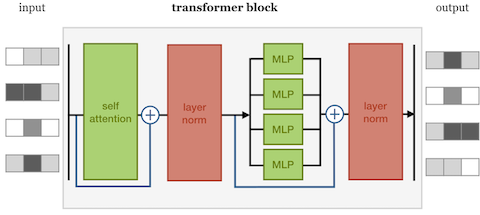

[image credits: [http://peterbloem.nl/blog/transformers](http://peterbloem.nl/blog/transformers)]

The transformer block thus consists of a self-attention layer, followed by layer norm, a MLP applied on each vector individually and another layer norm. Note the residual connections in the self-attention and MLP layer.

Now implement the transformer block as a PyTorch layer. All different components are already defined in `__init__` - your task is to connect them in the proper way in the `forward` method.

In [ ]:
class TransformerBlock(nn.Module):
    def __init__(self, k, heads, dropout=0.1):
        """
        Basic transformer block.

        Args:
            k: embedding dimension
            heads: number of heads (k mod heads must be 0)

        """
        super(TransformerBlock, self).__init__()

        self.att = MultiHeadAttention(k, heads=heads)

        self.norm1 = nn.LayerNorm(k)

        self.ff = nn.Sequential(
            nn.Linear(k, 4 * k),
            nn.ReLU(),
            nn.Linear(4 * k, k))
        
        self.norm2 = nn.LayerNorm(k)

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        """
        Forward pass of trasformer block.

        Args:
            x: input with shape of (b, k)
        
        Returns:
            y: output with shape of (b, k)
        """
        ########################################################################
        #        TODO: Perform the forward pass of a transformer block         #
        #                       as depicted in the image.                      #
        ########################################################################



        ########################################################################
        #                           END OF YOUR CODE                           #
        ########################################################################

        return y

In [ ]:
torch.manual_seed(123)

b, t, k = 4, 5, 6

x = torch.randn((b, t, k))

y_expected = torch.tensor([[[ 0.7410, -0.0098, -1.6372, -0.7155,  0.1238,  1.4976],
         [ 0.3302,  0.1532,  1.3658, -0.8297,  0.6722, -1.6917],
         [ 0.2061,  1.7712,  0.2474,  0.0786, -0.9281, -1.3753],
         [-0.7928,  0.3866,  1.0414,  1.0690,  0.0261, -1.7303],
         [ 1.0526, -1.4424,  1.2796, -0.3720, -0.9303,  0.4126]],

        [[ 0.1214, -1.6620, -0.8036,  1.2432,  0.0892,  1.0117],
         [-0.3496, -1.0407, -0.7206, -0.6595,  1.3490,  1.4214],
         [ 1.6434, -0.4602, -0.4305, -0.1173,  0.8413, -1.4767],
         [ 0.5016,  1.1910, -1.7864,  0.5852, -0.8269,  0.3355],
         [ 0.9192, -0.5294,  1.6293, -1.4026, -0.4855, -0.1310]],

        [[-1.0692, -1.4507, -0.2482,  0.6545,  1.1771,  0.9364],
         [-0.3693, -0.9339, -0.1780,  1.9624, -0.9452,  0.4639],
         [ 1.1320,  1.2037, -1.7683, -0.1069, -0.1177, -0.3428],
         [ 0.4731, -1.8217, -0.0605, -0.4119,  1.4701,  0.3509],
         [ 0.5669,  1.6360,  0.4623, -1.0489, -1.2450, -0.3713]],

        [[ 1.7579, -0.4814, -0.7436, -0.6281,  0.9766, -0.8814],
         [-0.8000, -0.4278, -1.4413,  1.4204,  1.0131,  0.2356],
         [ 1.3927,  0.3766, -1.3574,  1.0216, -0.6657, -0.7678],
         [-1.4835,  1.2110, -0.7496,  1.2892,  0.0578, -0.3248],
         [ 1.8534, -1.0981, -1.0474, -0.2566,  0.4255,  0.1232]]])

module = TransformerBlock(k, heads=3, dropout=0)
y = module(x)

print('Output shape:', y.shape)
print('Output is correct:', torch.allclose(y, y_expected, atol=1e-4))

## A7.5 Position embeddings and the Transformer architecture

Self-attention is permutation equivariant: changing the order of the input sequence will result in the exact same output sequence, but also with the same changes in the order. This equivariance property is not always desirable. Imagine we want to use a transformer architecture for sequence classification. To represent the whole sequence by a single feature vector we can append a pooling layer before the final classification layer. However, this would make the transformer architecture permutation invariant, i.e. it would give the same prediction regardless of the order of the sequence.

We can choose to explicitly include position information by adding values that encode position to the input vectors. A simple way to do this is by using the `nn.Embedding` module in PyTorch to learn position embeddings - see the [[docs](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html)] for more information. These are then simply summed to the input sequence.

The code for the transformer architecture is given below - you don't need to implement anything. Do examine the `forward` method though, especially the parts concerning the position embedding and average pooling. What does `self.output_projector` do and why is this necesary?

In [ ]:
class Transformer(nn.Module):
    def __init__(self, k, heads=8, num_layers=2, input_length=40,
                 num_inputs=256, num_outputs=10, dropout=0.1):
        """
        Transformer architecture.

        Args:
            k: embedding dimension
            heads: number of attention heads
            num_layers: number of transformer blocks in network
            input_length: length of input sequence
            num_inputs: input dimension
            num_outputs: ouput dimension
        """
        super(Transformer, self).__init__()

        # Embedding layers for input and position
        self.input_embedding = nn.Embedding(num_inputs, k)
        self.position_embedding = nn.Embedding(input_length, k)

        # Create transformer blocks
        blocks = [TransformerBlock(k, heads, dropout=dropout) for _ in range(num_layers)]
        self.blocks = nn.Sequential(*blocks)

		# Projects the output to desired output size
        self.output_projector = nn.Linear(k, num_outputs)

    def forward(self, x):
        """
        Forward pass of trasformer model.

        Args:
            x: input with shape of (b, t)
        """
        b, t = x.shape

        # Embed input
        x = self.input_embedding(x)

		# Add positional embedding
        p = torch.arange(t, device=x.device).view(1, t).expand(b, t)
        p = self.position_embedding(p)
        x = x + p

        # Compute transformer output
        x = self.blocks(x)
        
        # Average-pool over dimension t
        x = x.mean(dim=1)

        # Project output to desired size
        x = self.output_projector(x)

        return x

## A7.6 Train on IMDB dataset

You are ready to use your Trasformer model to perform sentiment classification on text data! For this we will use the IMDB dataset of movie reviews, where for each entry we will predict how positive or negative they score.

The following code block loads and structures the data. Contrary to the previous assignments our inputs now consist of integers instead of floats because we are now working with embeddings. Let's first prepare and examine the dataset.


In [ ]:
# Dataset related params
NUM_CLASSES = 2
VOCAB_SIZE = 50_000
MAX_LENGTH = 512
GRADIENT_CLIPPING = 1.0
BATCH_SIZE = 32
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# Set up fields
TEXT = data.Field(lower=True, include_lengths=True, batch_first=True)
LABEL = data.Field(sequential=False)

# Make splits for data
train_data, _ = datasets.IMDB.splits(TEXT, LABEL)
train_data, test_data = train_data.split(split_ratio=0.8)

# Build the vocabulary, -2 is to make space for <unk> and <pad>
TEXT.build_vocab(train_data, max_size=VOCAB_SIZE - 2)
LABEL.build_vocab(train_data)

# Make iterator for splits
train_iter, test_iter = data.BucketIterator.splits((train_data, test_data),
                                                    batch_size=BATCH_SIZE,
                                                    device=DEVICE)

# Print some example data
for i in range(5):
    print('Text: \t', ' '.join(train_data[i].text))
    print('Label: \t', train_data[i].label)


print(f'# of training examples: {len(train_data)}')
print(f'# of test examples: {len(test_data)}')

In similar fashion as in the previous assignment, we create some *utility* functions that make life easy when defining a main code block to run from. The following utility functions are created:

1. `train`: trains and updates the model. Needs a training data set, specific model, optimizer and loss function as inputs. This training procedure updates for 1 epoch only (see `run` later on).
2. `test`: tests a model on a specific data set (can be train, validation and/or testset). Needs the loader, model and loss function as inputs.
3. `run`: To make playing with transformer model different hyperparameters more straightforward, we provide the `run` function which you can give hyperparameters as arguments. The training procedure is consistent with previous assignments and makes use of `train` and `test`.

In [ ]:
def train(train_iter, model, optimizer, lr_scheduler, criterion):
    """
    Trains network for one epoch in batches.

    Args:
        train_iter: Data iterator for training set.
        model: Neural network model.
        optimizer: Optimizer (e.g. SGD).
        lr_scheduler: Scheduler for adjusting the optimization learning rate.
        criterion: Loss function (e.g. cross-entropy loss).
    """
  
    avg_loss = 0
    correct = 0
    total = 0

    # Switch to train mode
    model.train()

    # Iterate through batches
    for batch in tqdm(train_iter):

        optimizer.zero_grad()

        input = batch.text[0]
        label = batch.label - 1

        if input.size(1) > MAX_LENGTH:
            input = input[:, :MAX_LENGTH]
        output = model(input)
        loss = criterion(output, label)

        loss.backward()

        # Clip gradients if the total gradient vector has a length > 1, we
        # clip it back down to 1.
        if GRADIENT_CLIPPING > 0.0:
            nn.utils.clip_grad_norm_(model.parameters(), GRADIENT_CLIPPING)

        optimizer.step()
        lr_scheduler.step()

        # Keep track of loss and accuracy
        avg_loss += loss.item()
        _, predicted = torch.max(output, 1)
        total += label.size(0)
        correct += (predicted == label).sum().item()

    return avg_loss / len(train_iter), 100 * correct / total


def test(test_iter, model, criterion):
    """
    Evaluates network in batches.

    Args:
        test_iter: Data iterator for test set.
        model: Neural network model.
        criterion: Loss function (e.g. cross-entropy loss).
    """

    avg_loss = 0
    correct = 0
    total = 0

    # Switch to evaluation mode
    model.eval()
    
    # Use torch.no_grad to skip gradient calculation, not needed for evaluation
    with torch.no_grad():
        # Iterate through batches
        for batch in tqdm(test_iter):

            input = batch.text[0]
            label = batch.label - 1

            if input.size(1) > MAX_LENGTH:
                input = input[:, :MAX_LENGTH]
            
            # Forward pass
            output = model(input)
            loss = criterion(output, label)

            # Keep track of loss and accuracy
            avg_loss += loss.item()
            _, predicted = torch.max(output, 1)
            total += label.size(0)
            correct += (predicted == label).sum().item()

    return avg_loss / len(test_iter), 100 * correct / total


def run(epochs=80, k=128, heads=6, num_layers=6, dropout=0.1):
    """
    Run a test on IMDB
    """

    # Create a writer to write to Tensorboard
    writer = SummaryWriter()

    # Create classifier model
    model = Transformer(k, heads=heads, num_layers=num_layers,
                        input_length=MAX_LENGTH, num_inputs=VOCAB_SIZE,
                        num_outputs=NUM_CLASSES, dropout=dropout)
    model = model.to(DEVICE)

    # Create loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(params=model.parameters(), lr=1e-4)
    lr_scheduler = optim.lr_scheduler.LambdaLR(optimizer, lambda i: min(i / (10_000 / BATCH_SIZE), 1.0))

    # Training loop
    for epoch in range(epochs):

        print(f'\n Epoch {epoch}')
        
        # Train on data
        train_loss, train_acc = train(train_iter,
                                      model,
                                      optimizer,
                                      lr_scheduler,
                                      criterion)

        # Test on data
        test_loss, test_acc = test(test_iter,
                                   model,
                                   criterion)

        # Write metrics to Tensorboard
        writer.add_scalars('Loss', {
            'Train': train_loss,
            'Test': test_loss
        }, epoch)
        writer.add_scalars('Accuracy', {
            'Train': train_acc,
            'Test': test_acc
        }, epoch)
        writer.flush()

    print('\nFinished.')
    writer.close()

Train the model. Try different configurations: how do the various hyperparameters affect the model's performance?

**WARNING:** Training can take fairly long (i.e. a couple of minutes per epoch) for larger models.

In [ ]:
run(epochs=5, k=64, heads=4, num_layers=4, dropout=0.1)

Again, we will inspect the results in tensorboard.

In [ ]:
# Open Tensorboard (for Google Colab users)
%tensorboard --logdir runs/

# For local users only: uncomment the last line, run this cell once and wait for
# it to time out, run this cell a second time and you should see the board.
# %tensorboard --logdir runs/ --host localhost

In [ ]:
# To completely clean your tensorboard uncomment and run the following command.
# !rm -r runs

This concludes assignment 7!